In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import scanpy as sc
import torch
import lineagevi

In [11]:
adata_path = '/Users/lgolinelli/git/lineageVI/notebooks/data/outputs/pancreas_2025.09.12_13.51.28/adata_with_velocity.h5ad'
model_path = '/Users/lgolinelli/git/lineageVI/notebooks/data/outputs/pancreas_2025.09.12_13.51.28/vae_velocity_model.pt'

adata = sc.read_h5ad(adata_path)

linvi = lineagevi.LineageVI(
    adata,
)

linvi.model.load_state_dict(torch.load(model_path, map_location='cpu'))
linvi.model.eval()

LineageVIModel(
  (encoder): Encoder(
    (encoder): Sequential(
      (0): Linear(in_features=1805, out_features=128, bias=True)
      (1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (2): ReLU()
    )
    (mean_layer): Linear(in_features=128, out_features=647, bias=True)
    (logvar_layer): Linear(in_features=128, out_features=647, bias=True)
  )
  (gene_decoder): MaskedLinearDecoder(
    (linear): Linear(in_features=647, out_features=1805, bias=True)
  )
  (velocity_decoder): VelocityDecoder(
    (shared_decoder): Sequential(
      (0): Linear(in_features=647, out_features=128, bias=True)
      (1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (2): ReLU()
    )
    (gp_velocity_decoder): Linear(in_features=128, out_features=647, bias=True)
    (gene_velocity_decoder): Sequential(
      (0): Linear(in_features=128, out_features=5415, bias=True)
      (1): Softplus(beta=1.0, threshold=20.0)
    )
  )
)

In [12]:
outs = linvi.get_model_outputs(
        adata,
        n_samples=2,
        return_mean=False,
        return_negative_velo=True,
        base_seed=123,
        save_to_adata=False
    )

for k,v in outs.items():
    print(f'{k}:  {v.shape}')

recon:  (2, 3696, 1805)
z:  (2, 3696, 647)
mean:  (2, 3696, 647)
logvar:  (2, 3696, 647)
velocity_u:  (2, 3696, 1805)
velocity:  (2, 3696, 1805)
velocity_gp:  (2, 3696, 647)
alpha:  (2, 3696, 1805)
beta:  (2, 3696, 1805)
gamma:  (2, 3696, 1805)


/Users/lgolinelli/miniconda3/envs/test1/lib/python3.11/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/lgolinelli/miniconda3/envs/test1/lib/python3.11/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/lgolinelli/miniconda3/envs/test1/lib/python3.11/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: invalid value encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/lgolinelli/miniconda3/envs/test1/lib/python3.11/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/lgolinelli/miniconda3/envs/test1/lib/python3.11/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/lgolinelli/miniconda3/envs/test1/lib/python3.11/site-packages/scipy/_lib/_ut

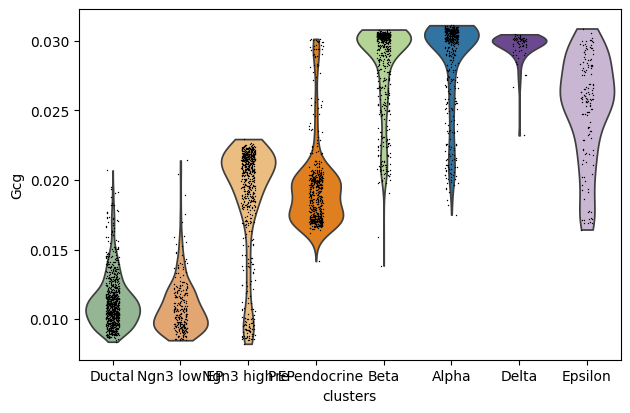

In [14]:
sc.pl.violin(adata, keys='Gcg', layer='alpha', groupby='clusters')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 492 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 1132 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 1548 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 2028 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 2572 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed:   58.1s


Adding directional_variance to adata.obs
Adding directional_difference to adata.obs
Adding directional_cosine_sim_variance to adata.obs
Adding directional_cosine_sim_difference to adata.obs
Adding directional_cosine_sim_mean to adata.obs
Plotting directional_cosine_sim_variance


[Parallel(n_jobs=-1)]: Done 3696 out of 3696 | elapsed:  1.1min finished


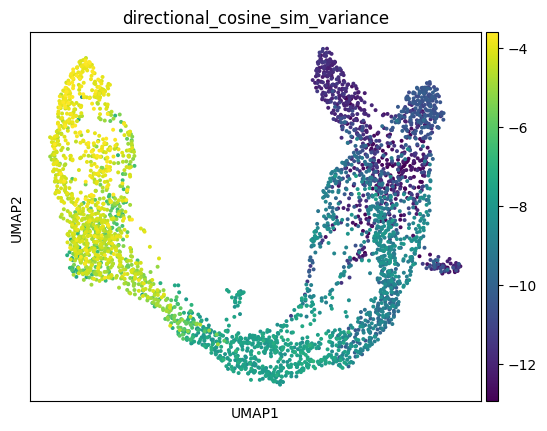

(                  directional_variance  directional_difference  \
 index                                                            
 AAACCTGAGAGGGATA              0.000010                0.009598   
 AAACCTGAGCCTTGAT              0.000579                0.081272   
 AAACCTGAGGCAATTA              0.000035                0.018632   
 AAACCTGCATCATCCC              0.005571                0.238226   
 AAACCTGGTAAGTGGC              0.000076                0.024348   
 ...                                ...                     ...   
 TTTGTCAAGTGACATA              0.000011                0.009450   
 TTTGTCAAGTGTGGCA              0.000037                0.018541   
 TTTGTCAGTTGTTTGG              0.003095                0.151338   
 TTTGTCATCGAATGCT              0.000002                0.004430   
 TTTGTCATCTGTTTGT              0.000017                0.011110   
 
                   directional_cosine_sim_variance  \
 index                                               
 AAACCTGAGAGGGATA  

In [15]:
linvi.get_directional_uncertainty(
    adata,
    use_gp_velo = False,
    n_samples = 50,
    n_jobs = -1,
    show_plot =  True,
    base_seed = None,
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 492 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 780 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 1132 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 1548 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 2028 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 2572 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done 3180 tasks      | elapsed:   53.1s


Adding directional_variance to adata.obs
Adding directional_difference to adata.obs
Adding directional_cosine_sim_variance to adata.obs
Adding directional_cosine_sim_difference to adata.obs
Adding directional_cosine_sim_mean to adata.obs
Plotting directional_cosine_sim_variance


[Parallel(n_jobs=-1)]: Done 3696 out of 3696 | elapsed:  1.0min finished


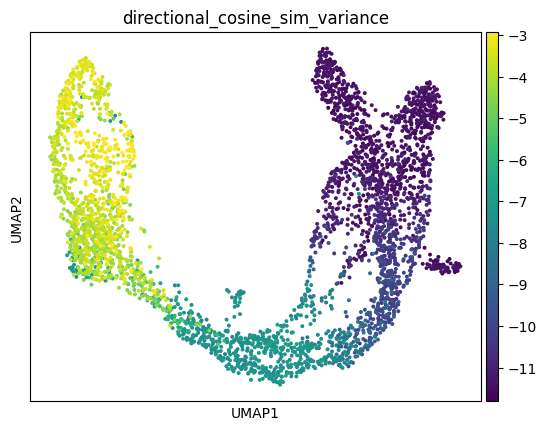

(                  directional_variance  directional_difference  \
 index                                                            
 AAACCTGAGAGGGATA          1.139779e-06                0.003399   
 AAACCTGAGCCTTGAT          1.772964e-03                0.126358   
 AAACCTGAGGCAATTA          7.510204e-07                0.002485   
 AAACCTGCATCATCCC          6.126466e-03                0.196042   
 AAACCTGGTAAGTGGC          1.138926e-04                0.033942   
 ...                                ...                     ...   
 TTTGTCAAGTGACATA          1.145393e-05                0.010180   
 TTTGTCAAGTGTGGCA          4.371249e-05                0.020051   
 TTTGTCAGTTGTTTGG          5.751729e-03                0.220425   
 TTTGTCATCGAATGCT          4.105175e-07                0.002003   
 TTTGTCATCTGTTTGT          6.500401e-07                0.002342   
 
                   directional_cosine_sim_variance  \
 index                                               
 AAACCTGAGAGGGATA  

In [16]:
linvi.get_directional_uncertainty(
    adata,
    use_gp_velo = True,
    n_samples = 50,
    n_jobs = -1,
    show_plot =  True,
    base_seed = None,
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 516 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 964 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 1540 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 2244 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 3076 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 3696 out of 3696 | elapsed:   30.7s finished


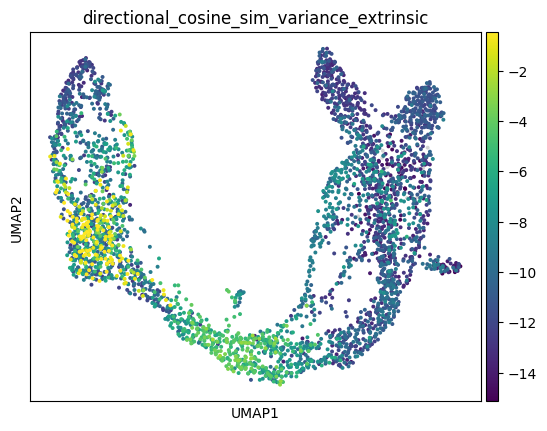

In [17]:
df = linvi.compute_extrinsic_uncertainty(
    adata,
    use_gp_velo=False,
    n_samples=25, 
    n_jobs=-1,
    show_plot=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 516 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 964 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 1540 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 2244 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 3076 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 3696 out of 3696 | elapsed:   31.2s finished


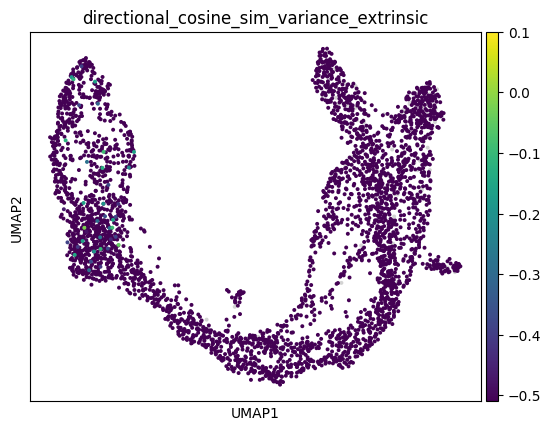

In [18]:
df = linvi.compute_extrinsic_uncertainty(
    adata,
    use_gp_velo=True,
    n_samples=25, 
    n_jobs=-1,
    show_plot=True)